In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df= pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head(5)
#各个字段取值个数
for i in range(21):
    print(df.iloc[:,i].value_counts())
df.shape


2560-WBWXF    1
7998-ZLXWN    1
4377-VDHYI    1
1930-BZLHI    1
7359-SSBJK    1
             ..
9800-OUIGR    1
0725-CXOTM    1
7460-ITWWP    1
7813-ZGGAW    1
8267-ZNYVZ    1
Name: customerID, Length: 7043, dtype: int64
Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes

(7043, 21)

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df['TotalCharges'].apply(pd.to_numeric, errors='coerce')#object转为float
df['TotalCharges'].isnull().sum()#再次查看缺失值
df.dropna(inplace=True)#删除缺失行

In [6]:
df['Churn'].replace('Yes',1,inplace=True)
df['Churn'].replace('No',0,inplace=True)

([<matplotlib.patches.Wedge at 0x1eb54dab4c0>,
 [Text(-0.7393678277834757, 0.8144539368428056, '未流失用户'),
  Text(0.7393677515287918, -0.8144540060674139, '流失用户')],
 [Text(-0.4032915424273503, 0.44424760191425755, '73.5%'),
  Text(0.4032915008338864, -0.4442476396731348, '26.5%')])

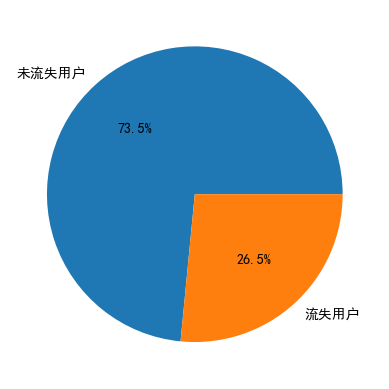

In [7]:
plt.rcParams['font.sans-serif']=['SimHei']  #正常显示中文
plt.rcParams['axes.unicode_minus'] = False  #正常显示负号

labels = ['未流失用户','流失用户']
Churn = df['Churn'].value_counts()
plt.pie(Churn,labels=labels,autopct='%.1f%%')

<AxesSubplot:title={'center':'区分经济独立对流失的影响'}, xlabel='Dependents', ylabel='count'>

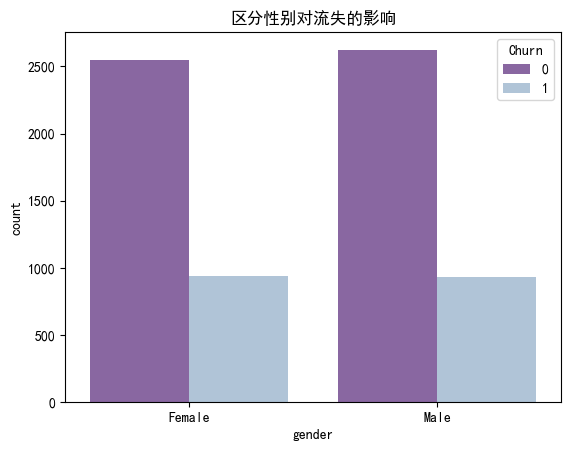

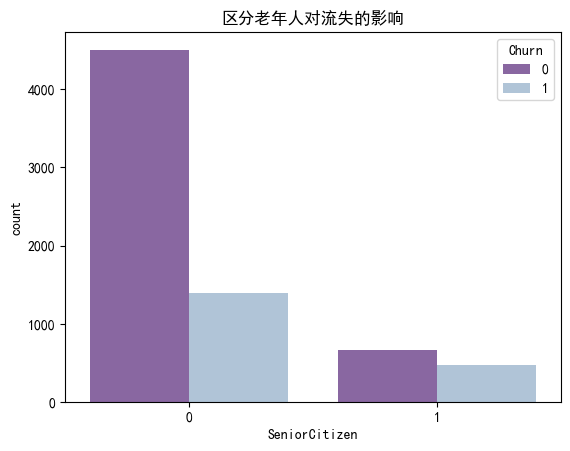

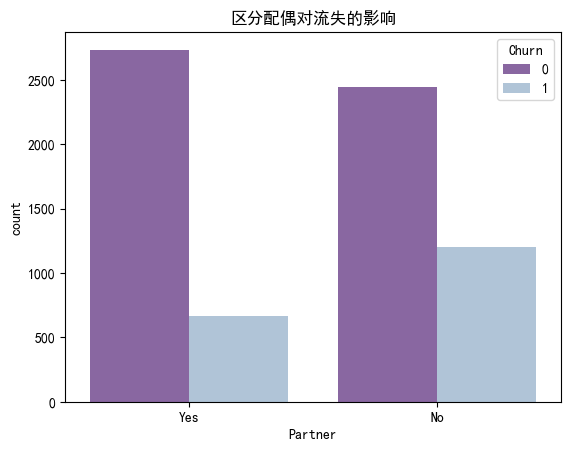

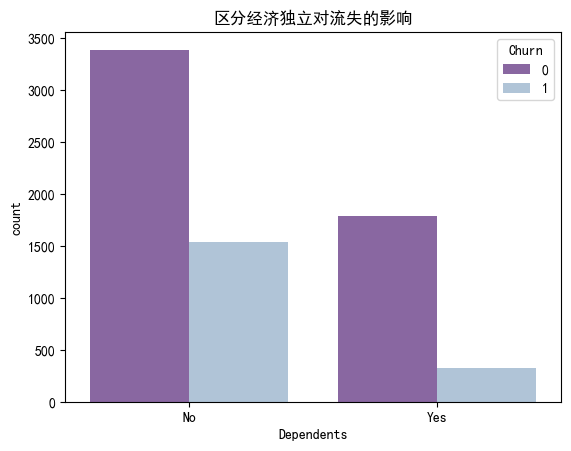

In [8]:
plt.figure(1),plt.title('区分性别对流失的影响')
sns.countplot(x='gender',hue='Churn',data=df,palette='BuPu_r')
plt.figure(2),plt.title('区分老年人对流失的影响')
sns.countplot(x='SeniorCitizen',hue='Churn',data=df,palette='BuPu_r')
plt.figure(3),plt.title('区分配偶对流失的影响')
sns.countplot(x='Partner',hue='Churn',data=df,palette='BuPu_r')
plt.figure(4),plt.title('区分经济独立对流失的影响')
sns.countplot(x='Dependents',hue='Churn',data=df,palette='BuPu_r')


In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
lst = []
columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
for i in range(1,20):
    corrdf = labelencoder.fit_transform(df.iloc[:,i])
    lst.append(corrdf)
df2 = pd.DataFrame(map(list,zip(*lst)),columns=columns)
df2.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014623,-0.005291
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.219524,0.037653
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.106501,0.059568
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.107507,-0.009572
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.268133,0.158523
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.271209,0.083195
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.444580,0.114955
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.244965,-0.055724
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.044692,0.042357
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.141258,0.090756


<AxesSubplot:>

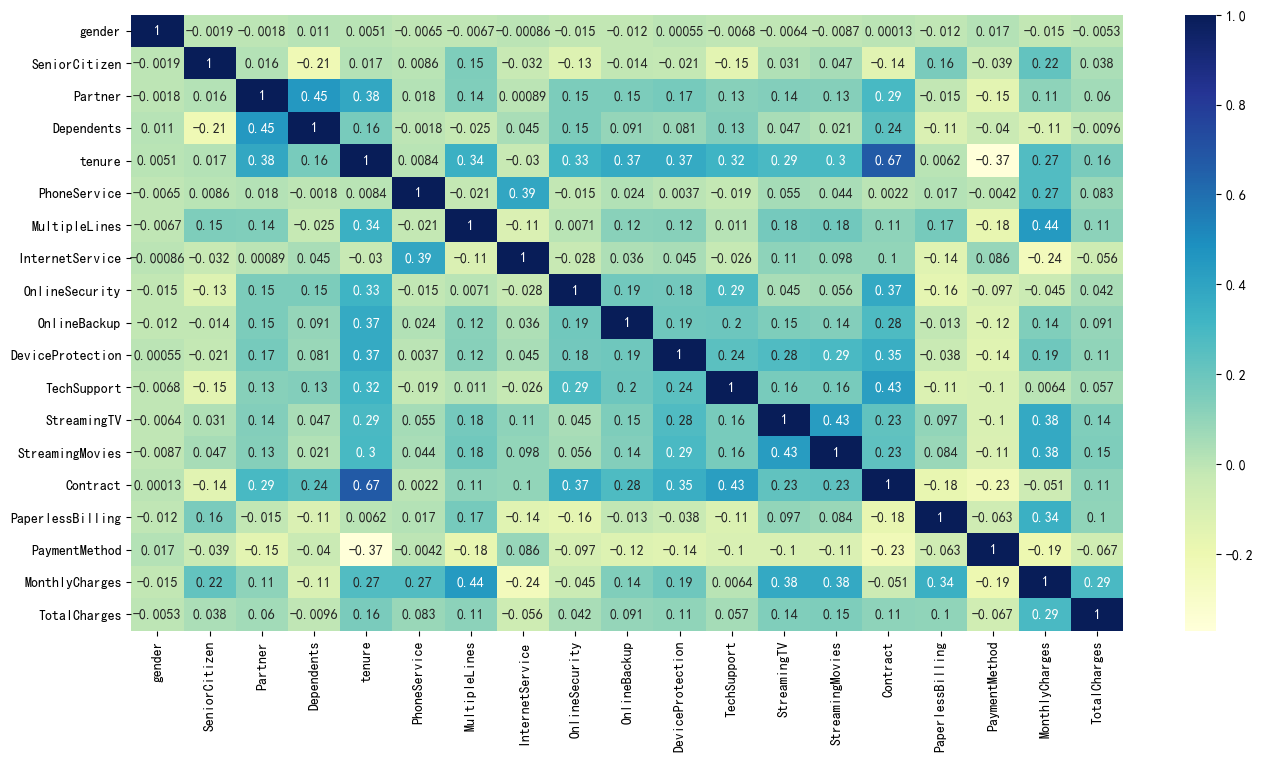

In [10]:
plt.figure(figsize=(16,8))
sns.heatmap(df2.corr(),cmap='YlGnBu',annot=True)


<AxesSubplot:title={'center':'Churn与各特征之间相关性'}>

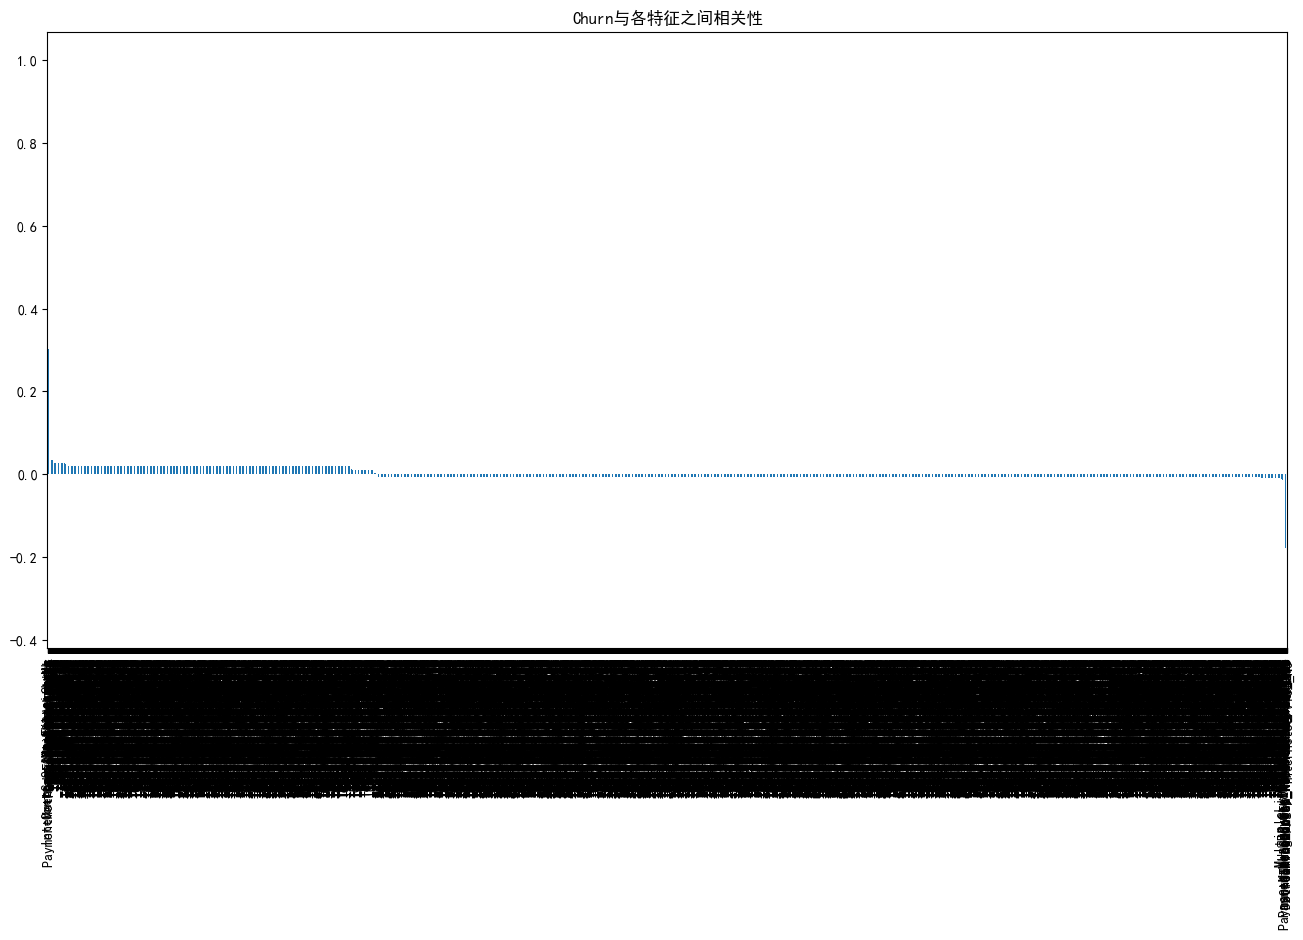

In [11]:
df_churn = pd.get_dummies(df.iloc[:,1:21])
plt.figure(figsize=(16,8)),plt.title('Churn与各特征之间相关性')
df_churn.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

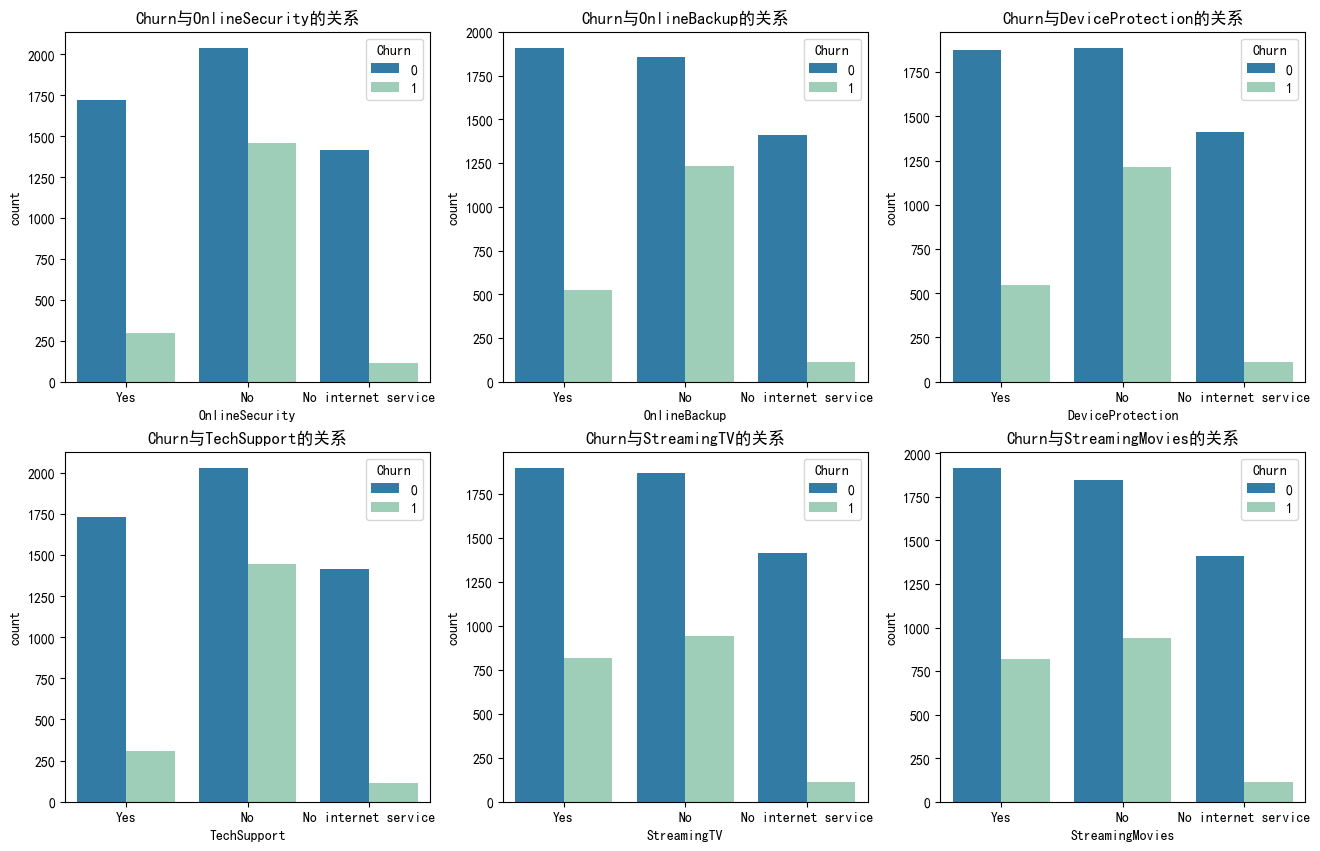

In [12]:
columns=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(16,10))
for i,item in enumerate(columns):#enumerate变量数据对象如列表，返回每个数据及其下标
    plt.subplot(2,3,(i+1))
    ax = sns.countplot(x=item,hue='Churn',data=df,order=['Yes','No','No internet service'],palette='YlGnBu_r')
    #频数柱形图，x为每个特征，hue为区分是否流失，y为频数，order可以规定x内显示顺序
    plt.xlabel(str(item))
    plt.title('Churn与'+str(item)+'的关系')
    i = i+1
plt.show()

Text(0, 0.5, 'Churn：流失占比')

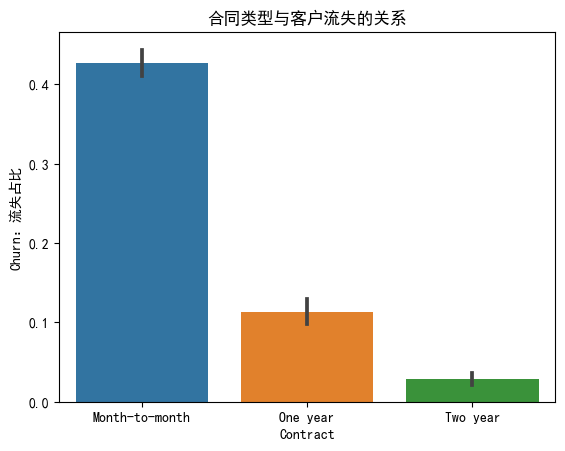

In [13]:
plt.title('合同类型与客户流失的关系')
sns.barplot(x='Contract',y='Churn',data=df,order=['Month-to-month','One year','Two year'])
plt.ylabel('Churn：流失占比')

Text(0, 0.5, 'Churn：流失占比')

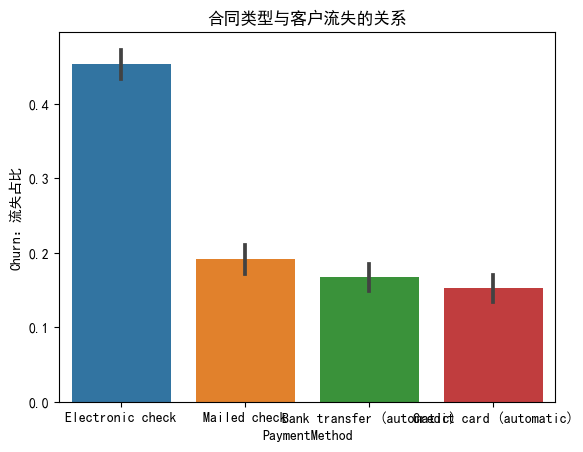

In [14]:
#付款方式与流失的关系
plt.title('合同类型与客户流失的关系')
sns.barplot(x='PaymentMethod',y='Churn',data=df,order=['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'])
plt.ylabel('Churn：流失占比')

In [15]:
df_new= df.iloc[:,2:20]
df_new.drop('PhoneService',inplace=True,axis=1)
df_id = df['customerID']#提取客户ID

In [16]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
standard.fit(df_new[['tenure','MonthlyCharges','TotalCharges']])

df_new[['tenure','MonthlyCharges','TotalCharges']] = standard.transform(df_new[['tenure','MonthlyCharges','TotalCharges']])
sns.boxplot(data=df_new[['tenure','MonthlyCharges','TotalCharges']])
plt.title('职位、月费用和总费用箱型图可视化')


ValueError: could not convert string to float: ''

In [ ]:
#查看对象类型都有哪些值
def uni(data):
    print(data,'--',df_new[data].unique())
dfobject = df_new.select_dtypes('object')
for i in range(0,len(dfobject.columns)):
    uni(dfobject.columns[i])


In [ ]:
df_new.replace('No internet service','No',inplace=True)
df_new.replace('No phone service','No',inplace=True)
for i in range(0,len(dfobject.columns)):
    uni(dfobject.columns[i])

In [ ]:
def labelend(data):
    df_new[data] = labelencoder.fit_transform(df_new[data])#labelencoder进行编码
for i in range(0,len(dfobject.columns)):
    labelend(dfobject.columns[i])
for i in range(0,len(dfobject.columns)):
    uni(dfobject.columns[i])


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
X = df_new#删除与流失无关的列，将对象类型进行编码，将数值较大列进行归一化后得到的特征集
y = df['Churn'].values#标签集
sss = StratifiedShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
for train_index,test_index in sss.split(X,y):
    print('train',train_index,'test',test_index)#得到训练集和测试集的index
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]#训练集特征，测试集特征
    y_train,y_test = y[train_index],y[test_index]#训练集标签，测试集标签
    


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
X = df_new#删除与流失无关的列，将对象类型进行编码，将数值较大列进行归一化后得到的特征集
y = df['Churn'].values#标签集
sss = StratifiedShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
for train_index,test_index in sss.split(X,y):
    print('train',train_index,'test',test_index)#得到训练集和测试集的index
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]#训练集特征，测试集特征
    y_train,y_test = y[train_index],y[test_index]#训练集标签，测试集标签
    


In [ ]:
print('原始数据特征',X.shape)
print('训练数据特征',X_train.shape)
print('测试数据特征',X_test.shape)


In [ ]:
print('原始数据标签',y.shape)
print('训练数据标签',y_train.shape)
print('测试数据标签',y_test.shape)


In [ ]:
#算法
from sklearn.svm import SVC #支持向量机
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.naive_bayes import GaussianNB#朴素贝叶斯
from sklearn.tree import DecisionTreeClassifier#决策树分类器

from sklearn.metrics import recall_score,f1_score,precision_score
Classifiers = [['SVM',SVC()],
              ['LogisticRegression',LogisticRegression()],
              ['GaussianNB',GaussianNB()],
              ['DecisionTreeClassifier',DecisionTreeClassifier()]]


In [ ]:
Classify_results = []
names = []
prediction = []
for name ,classifier in Classifiers:
    classifier.fit(X_train,y_train)#训练这4个模型
    y_pred = classifier.predict(X_test)#预测这4个模型
    recall = recall_score(y_test,y_pred)#评估这四个模型的召回率
    precision = precision_score(y_test,y_pred)#评估这四个模型的精确率
    f1 = f1_score(y_test,y_pred)#评估这四个模型的f1分数
    class_eva = pd.DataFrame([recall,precision,f1])#将召回率、精确率和f1分数放在df中，方便接下来对比
    Classify_results.append(class_eva)
    name = pd.Series(name)
    names.append(name)
    y_pred = pd.DataFrame(y_pred)
    prediction.append(y_pred)





In [ ]:
names = pd.DataFrame(names)
result = pd.concat(Classify_results,axis=1)
result.columns = names
result.index=[['recall','precision','f1']]
result



In [ ]:
df_test = df_new.tail(10)#截取数据最后10行
cutid_test = df['customerID'].tail(10)#取出最后10行的ID


In [ ]:
model = GaussianNB()
model.fit(X_train,y_train)#训练
pred_test_y = model.predict(df_test)#用最后10行的数据做预测
predf = pd.DataFrame({'customerID':cutid_test,'churn':pred_test_y})